In [1]:
import bs4
import urllib.request as url

In [2]:
path1="https://en.wikipedia.org/wiki/International_cricket_in_2019"

In [3]:
resp1=url.urlopen(path1)
wp1=bs4.BeautifulSoup(resp1,'lxml')

In [4]:
div=wp1.find('div',class_="stack-object")

In [5]:
head=div.findAll('th')

In [6]:
t_head=[]
for i in head:
    t_head.append(i.text)

In [7]:
 for i in range(len(t_head)):
    t_head[i]=t_head[i].replace("\n","")

In [8]:
rows=t_head[1:]

In [9]:
t_data=[]

In [10]:
for j in range(2,10):
    path1="https://en.wikipedia.org/wiki/International_cricket_in_201"
    path2=path1+str(j)
    resp2=url.urlopen(path2)
    wp2=bs4.BeautifulSoup(resp2,'lxml')
    div1=wp2.find('div',class_="stack-object")
    data=div1.findAll('td')
    for i in data:
        t_data.append(i.text)

In [11]:
 for i in range(len(t_data)):
    t_data[i]=t_data[i].replace("\n","")
    t_data[i]=t_data[i].replace(",","")

In [12]:
x=len(t_data)/5

In [13]:
import numpy as np

In [14]:
arr=np.array(t_data)
arr=arr.reshape(int(x),5)

In [15]:
import pandas as pd

In [16]:
pd.DataFrame(arr)

,0,1,2,3,4
0,1,England,44,5124,116
1,2,South Africa,32,3709,116
2,3,Australia,46,5153,112
3,4,India,46,5103,111
4,5,Pakistan,35,3781,108
5,6,Sri Lanka,38,3780,99
6,7,West Indies,34,2898,85
7,8,New Zealand,28,2366,85
8,9,Bangladesh,18,135,8
9,1,South Africa,36,4601,128


In [17]:
df=pd.DataFrame(arr,columns=rows)

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
encode=LabelEncoder()

In [20]:
Team=df['Team']
Matches=df['Matches']
Points=df['Points']

In [21]:
Rating=df['Rating']
x0=np.ones(len(Rating))

In [22]:
Team=encode.fit_transform(Team)

In [23]:
X=np.array([x0,Team,Matches,Points]).T
Y=np.array(Rating)

In [24]:
B=np.zeros(4)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
std=StandardScaler()

In [27]:
X=std.fit_transform(X)
Y=Y.reshape(-1,1)
Y=std.fit_transform(Y)

In [28]:
n=len(Y)
def Cost_function(X,Y,B):
    return np.sum((X.dot(B)-Y)**2)/(2*n)
Cost_function(X,Y,B)

39.00000000000001

In [29]:
def Gradient_Descent(X,Y,B,epochs,alpha):
    CostHistory=[0]*len(Y)
    for i in range(epochs):
        y_pred=X.dot(B)
        loss=y_pred-Y
        grad=X.T.dot(loss/n)
        B=B-alpha*grad
        CostHistory[i]=Cost_function(X,Y,B)
    return CostHistory,B

In [30]:
cost,b=Gradient_Descent(X,Y.flatten(),B,78,0.001)

In [31]:
b

array([ 0.        , -0.01928888,  0.04931123,  0.06148236])

In [32]:
import matplotlib.pyplot as plt

In [33]:
X1= [i for i in range(78)]

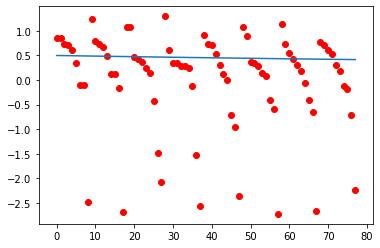

In [34]:
plt.plot(X1,cost)
plt.scatter(X1,Y,color="Red")